In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()

train_X = train_X / 255.0

test_X = test_X / 255.0

train_X, _, train_Y, _ = train_test_split(train_X, train_Y, test_size=0.9, random_state=565)
test_X, _, test_Y, _ = train_test_split(test_X, test_Y, test_size=0.9, random_state=565)


train_X = np.reshape(train_X, (6000, 28*28))
test_X = np.reshape(test_X, (1000, 28*28))


bootstrap_it = [1, 2, 11, 22, 44, 88]

results = {}

for k in range(1, 11):
  results[k] = {}
  for b in bootstrap_it:
    accuracies = []
    for i in range(b):
      boot_index = np.random.choice(len(train_X), len(train_X), replace=True)
      train2_X = train_X[boot_index]
      train2_Y = train_Y[boot_index]

      out_of_boot = list(set(range(len(train_X))) - set(boot_index))
      X_oob = train_X[out_of_boot]
      Y_oob = train_Y[out_of_boot]

      if len(X_oob) > 0:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train2_X, train2_Y)
        accuracy = knn.score(X_oob, Y_oob)
        accuracies.append(accuracy)
    if accuracies:
      mean_accuracy = np.mean(accuracies)
      results[k][b] = mean_accuracy
      print(f"Accuracy for {k} in {b} iterations: {results[k][b]:.7f}")


Accuracy for 1 in 1 iterations: 0.9318914
Accuracy for 1 in 2 iterations: 0.9300267
Accuracy for 1 in 11 iterations: 0.9250744
Accuracy for 1 in 22 iterations: 0.9262938
Accuracy for 1 in 44 iterations: 0.9267845
Accuracy for 1 in 88 iterations: 0.9268835
Accuracy for 2 in 1 iterations: 0.9122085
Accuracy for 2 in 2 iterations: 0.9215934
Accuracy for 2 in 11 iterations: 0.9188324
Accuracy for 2 in 22 iterations: 0.9168165
Accuracy for 2 in 44 iterations: 0.9187118
Accuracy for 2 in 88 iterations: 0.9162802
Accuracy for 3 in 1 iterations: 0.9155756
Accuracy for 3 in 2 iterations: 0.9147884
Accuracy for 3 in 11 iterations: 0.9210303
Accuracy for 3 in 22 iterations: 0.9198287
Accuracy for 3 in 44 iterations: 0.9185918
Accuracy for 3 in 88 iterations: 0.9186396
Accuracy for 4 in 1 iterations: 0.9217274
Accuracy for 4 in 2 iterations: 0.9164225
Accuracy for 4 in 11 iterations: 0.9150828
Accuracy for 4 in 22 iterations: 0.9152233
Accuracy for 4 in 44 iterations: 0.9162332
Accuracy for 4 in 8

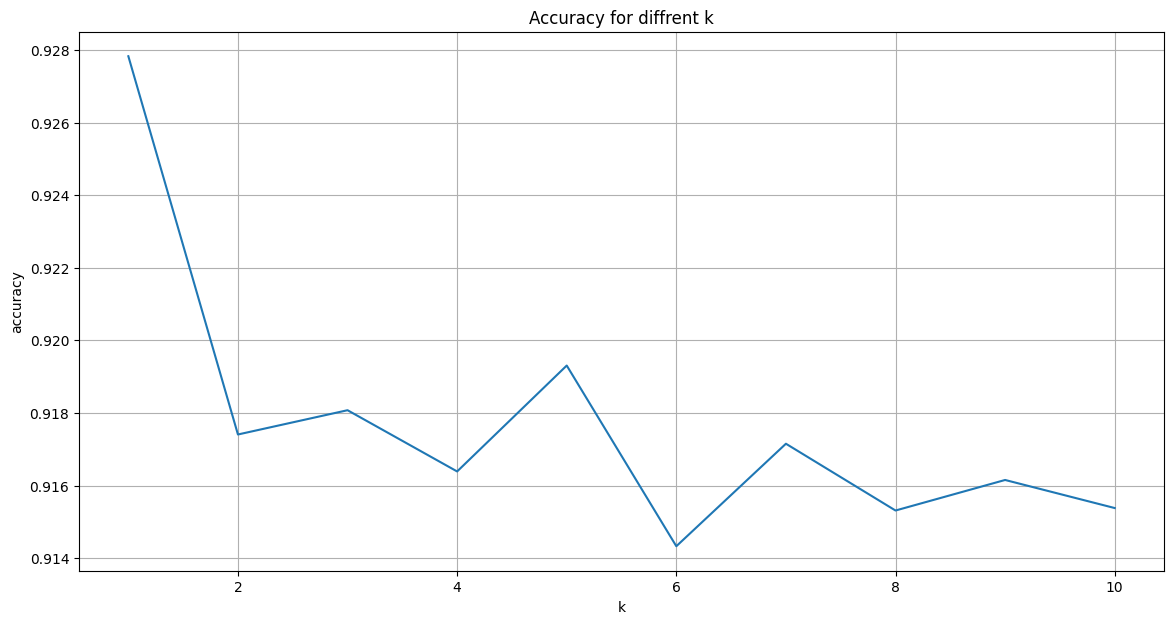

In [ ]:
mean_accuracy_k = [np.mean(list(k.values())) for k in results.values()]

plt.figure(figsize=(14,7))
plt.plot(range(1, 11), mean_accuracy_k)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("Accuracy for diffrent k")
plt.grid()
plt.show()

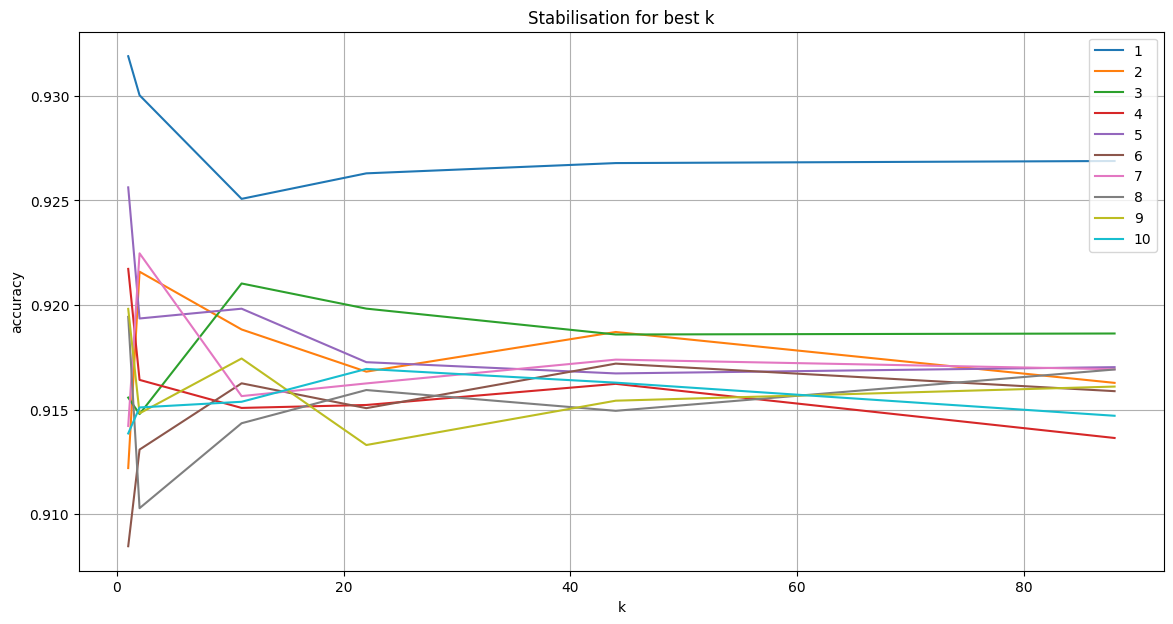

In [ ]:
plt.figure(figsize=(14,7))
for i in range(1, 11):
  plt.plot(bootstrap_it, [results[i][j] for j in bootstrap_it])
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("Stabilisation for best k")
plt.grid()
plt.legend(range(1, 11))
plt.show()